In [198]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(gridExtra)
install.packages("leaps")
library(leaps)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [199]:
sleep <- read.csv("Sleep_Efficiency.csv", header = T)

In [200]:
head(sleep)

,ID,Age,Gender,Bedtime,Wakeup.time,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0,0,Yes,3
2,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0,3,Yes,3
3,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,3
4,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50,5,Yes,1
5,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,No,3
6,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0,NA,0,No,1


In [201]:
map_df(sleep, ~sum(is.na(.)))
##check for na values

ID,Age,Gender,Bedtime,Wakeup.time,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,20,25,14,0,6


In [202]:
## filter out na values, select only the variables we need
##tidy data
sleep_clean <- filter(sleep, !is.na(Exercise.frequency),!is.na(Alcohol.consumption))
sleep_data <- sleep_clean |>
                  select(
                     Age,
                     Exercise.frequency,
                     Alcohol.consumption,
                     REM.sleep.percentage)

In [203]:
head(sleep_data)

,Age,Exercise.frequency,Alcohol.consumption,REM.sleep.percentage
,<int>,<dbl>,<dbl>,<int>
1,65,3,0,18
2,69,3,3,19
3,40,3,0,20
4,40,1,5,23
5,57,3,3,27
6,36,1,0,23


In [204]:
count(sleep_data)

n
<int>
432


In [205]:
##mean values for each variables can be used if needed
summary(sleep_data)

      Age       Exercise.frequency Alcohol.consumption REM.sleep.percentage
 Min.   : 9.0   Min.   :0.000      Min.   :0.000       Min.   :15.00       
 1st Qu.:29.0   1st Qu.:0.000      1st Qu.:0.000       1st Qu.:20.00       
 Median :40.0   Median :2.000      Median :0.000       Median :22.00       
 Mean   :40.5   Mean   :1.769      Mean   :1.169       Mean   :22.68       
 3rd Qu.:52.0   3rd Qu.:3.000      3rd Qu.:2.000       3rd Qu.:25.00       
 Max.   :69.0   Max.   :5.000      Max.   :5.000       Max.   :30.00       

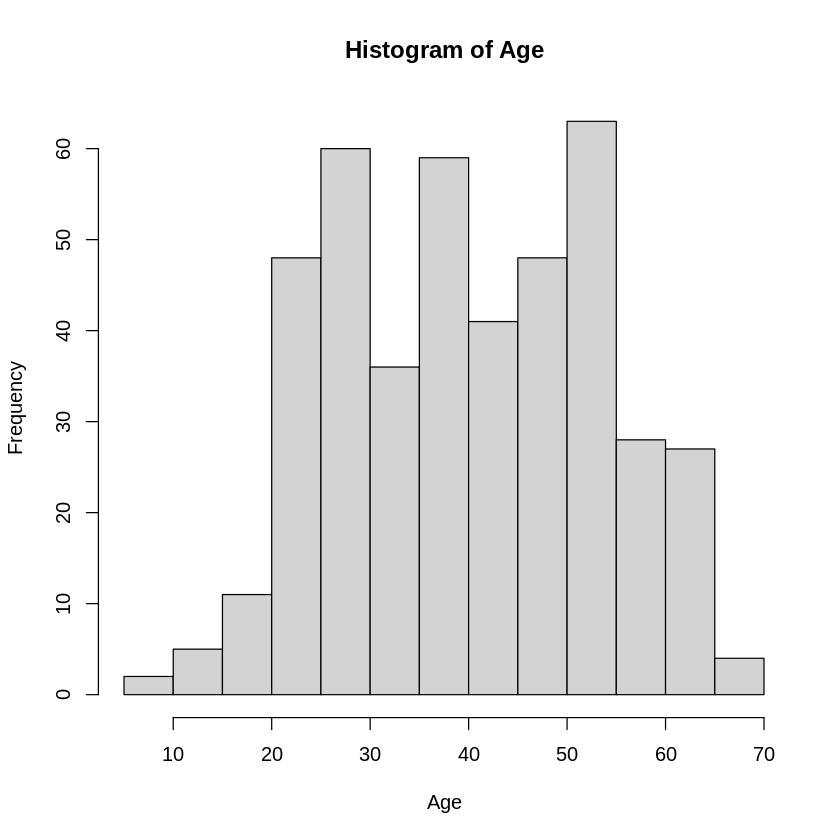

In [206]:
##next are 3 graphs for our predict variables
Age <- sleep_data$Age
hist(Age)

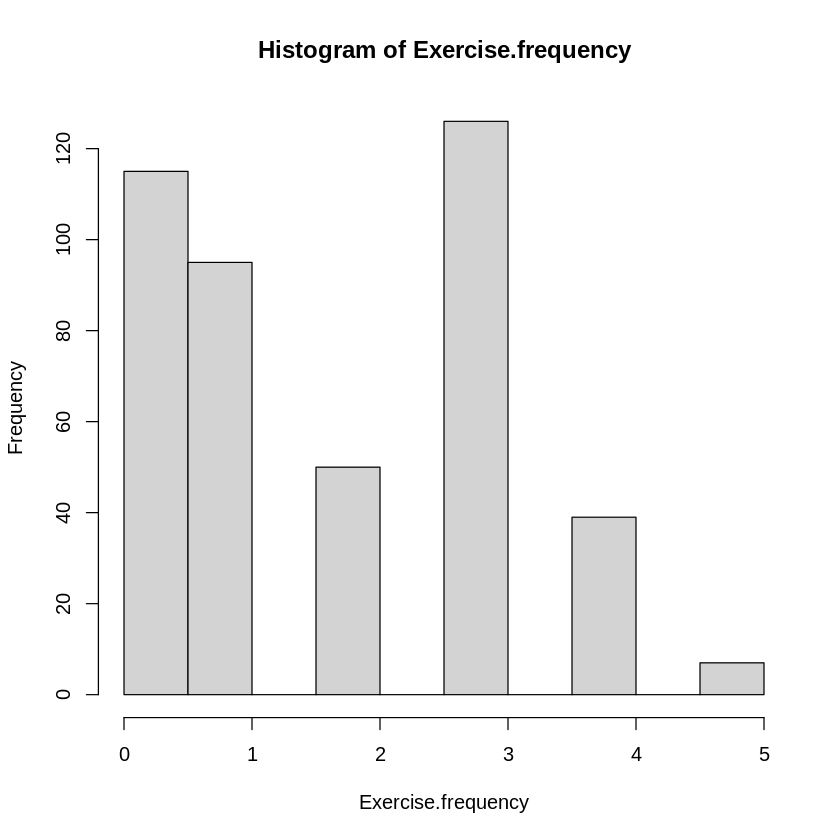

In [207]:
Exercise.frequency <- sleep_data$Exercise.frequency
hist(Exercise.frequency)

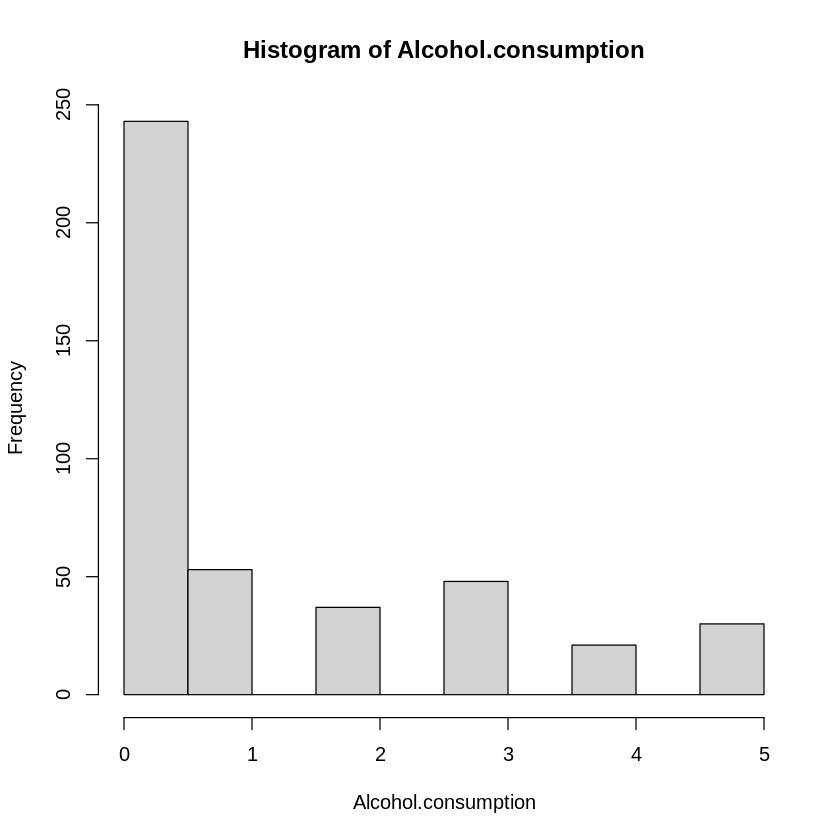

In [208]:
Alcohol.consumption <- sleep_data$Alcohol.consumption
hist(Alcohol.consumption)

In [209]:
## we split data into traing and testing
sleep_split <- initial_split(sleep_data, prop = 0.7, strata = REM.sleep.percentage)
sleep_training <- training(sleep_split)
sleep_testing <- testing(sleep_split)

In [210]:
##  additive model
reg <- lm(REM.sleep.percentage~Age+Alcohol.consumption+Exercise.frequency, data = sleep_training) 
summary(reg) 


Call:
lm(formula = REM.sleep.percentage ~ Age + Alcohol.consumption + 
    Exercise.frequency, data = sleep_training)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1650 -2.7772 -0.4583  2.2830  7.0571 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         22.323611   0.664107  33.614   <2e-16 ***
Age                  0.009397   0.015078   0.623    0.534    
Alcohol.consumption -0.136778   0.126229  -1.084    0.279    
Exercise.frequency   0.090519   0.138690   0.653    0.514    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.407 on 297 degrees of freedom
Multiple R-squared:  0.006574,	Adjusted R-squared:  -0.003461 
F-statistic: 0.6551 on 3 and 297 DF,  p-value: 0.5803


In [211]:
## interactive
reg_inter <- lm(REM.sleep.percentage~Age*Alcohol.consumption*Exercise.frequency, data = sleep_training) 
summary(reg_inter)


Call:
lm(formula = REM.sleep.percentage ~ Age * Alcohol.consumption * 
    Exercise.frequency, data = sleep_training)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1505 -2.6185 -0.3515  2.3757  7.2978 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                21.762013   1.054078  20.646
Age                                         0.024453   0.025853   0.946
Alcohol.consumption                         0.255417   0.704043   0.363
Exercise.frequency                          0.977004   0.594572   1.643
Age:Alcohol.consumption                    -0.010618   0.015635  -0.679
Age:Exercise.frequency                     -0.021976   0.013777  -1.595
Alcohol.consumption:Exercise.frequency     -0.531692   0.311535  -1.707
Age:Alcohol.consumption:Exercise.frequency  0.013714   0.007097   1.932
                                           Pr(>|t|)    
(Intercept)                                  <2e-16 ***
Age         

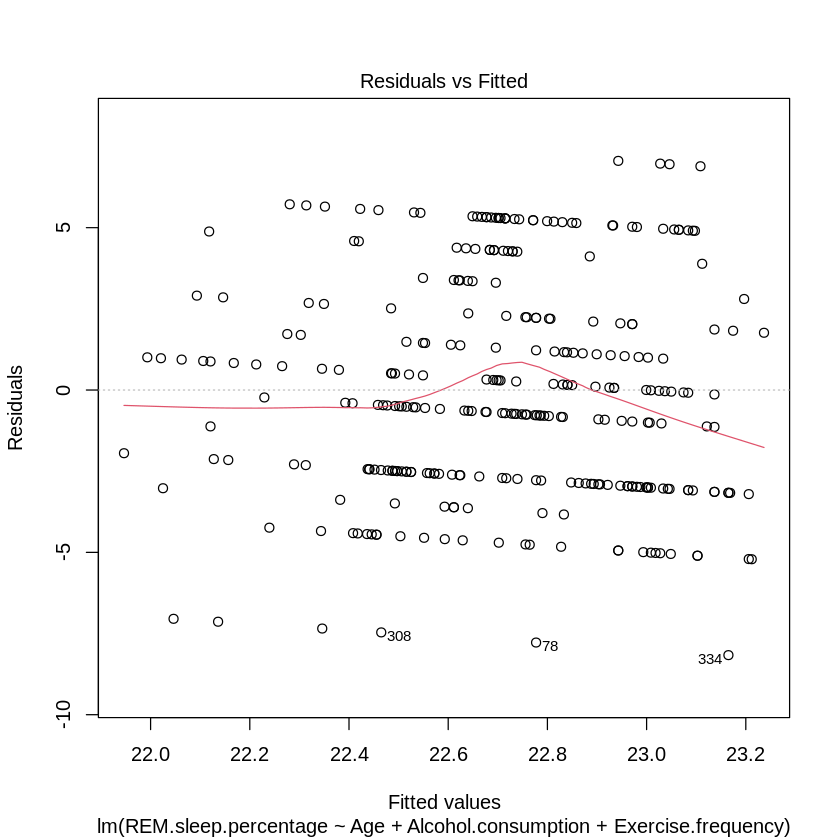

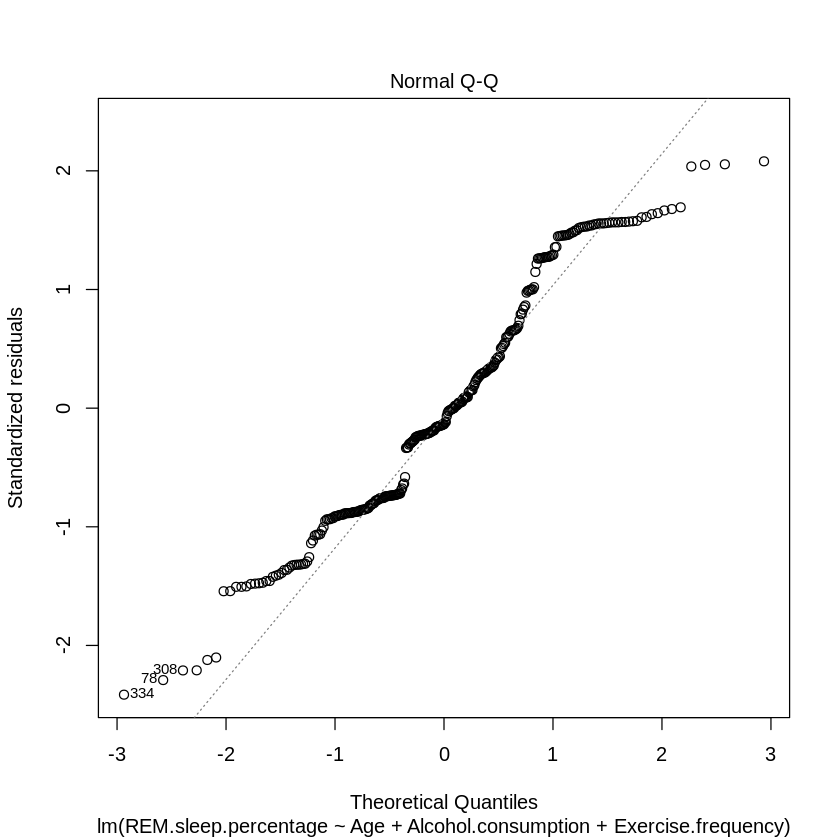

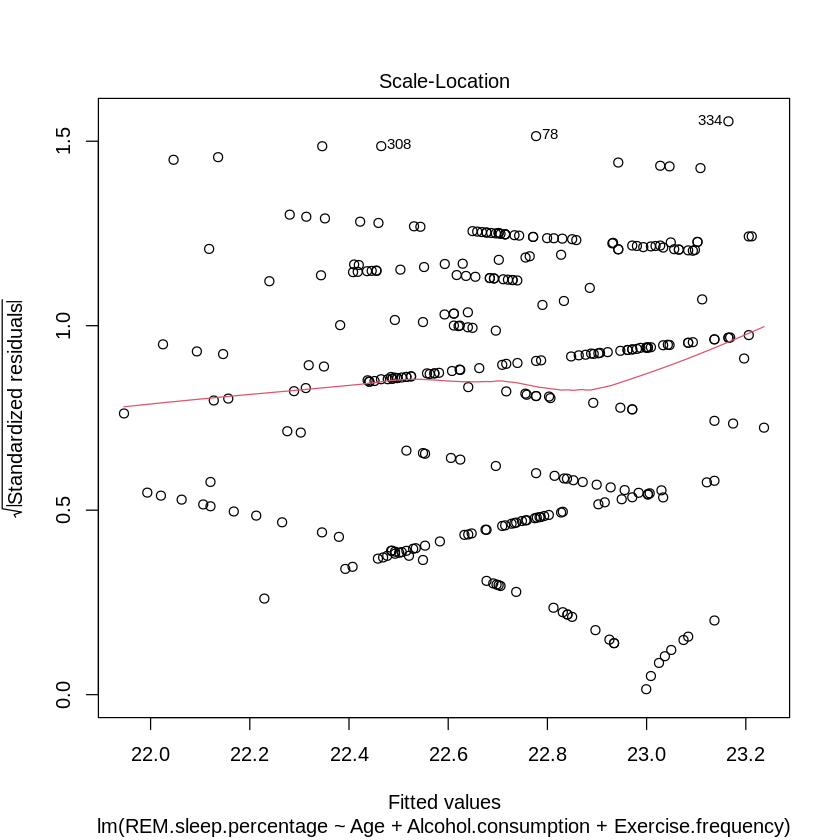

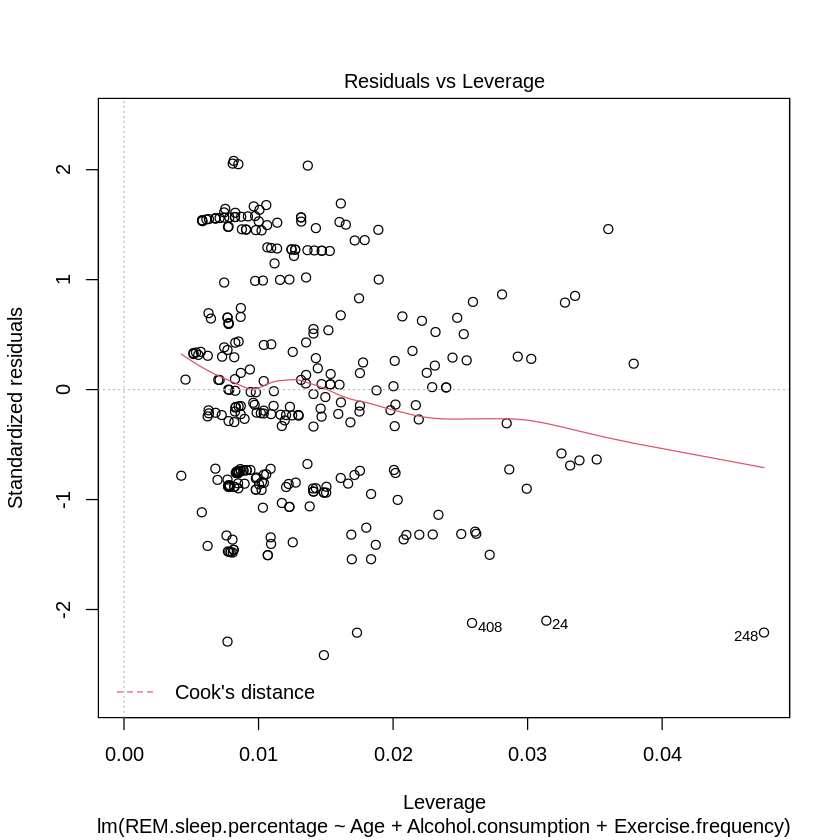

In [212]:
plot(reg)

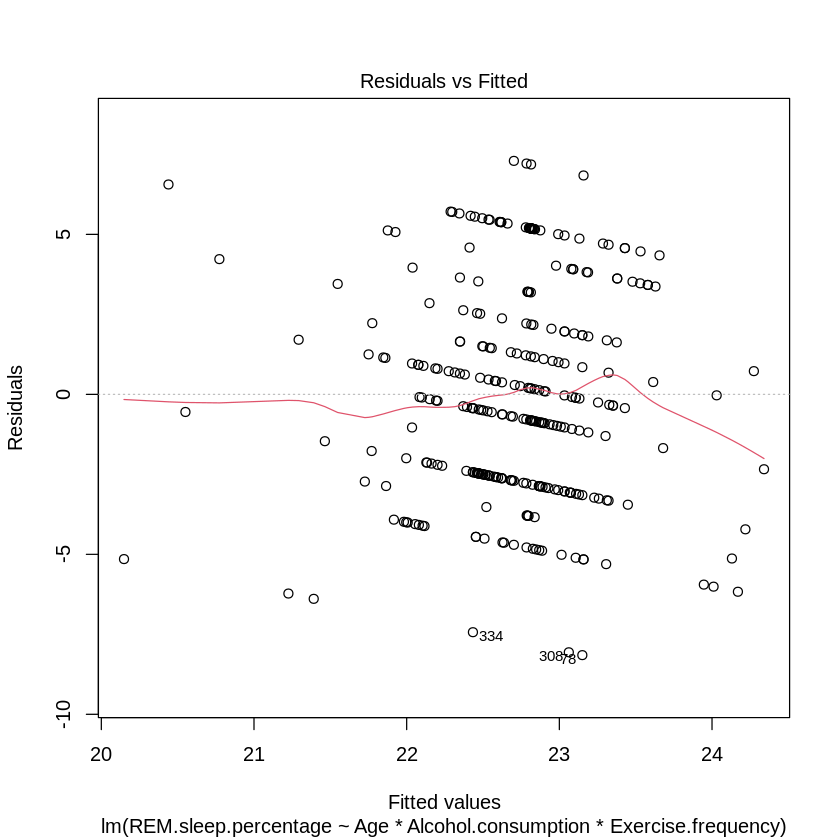

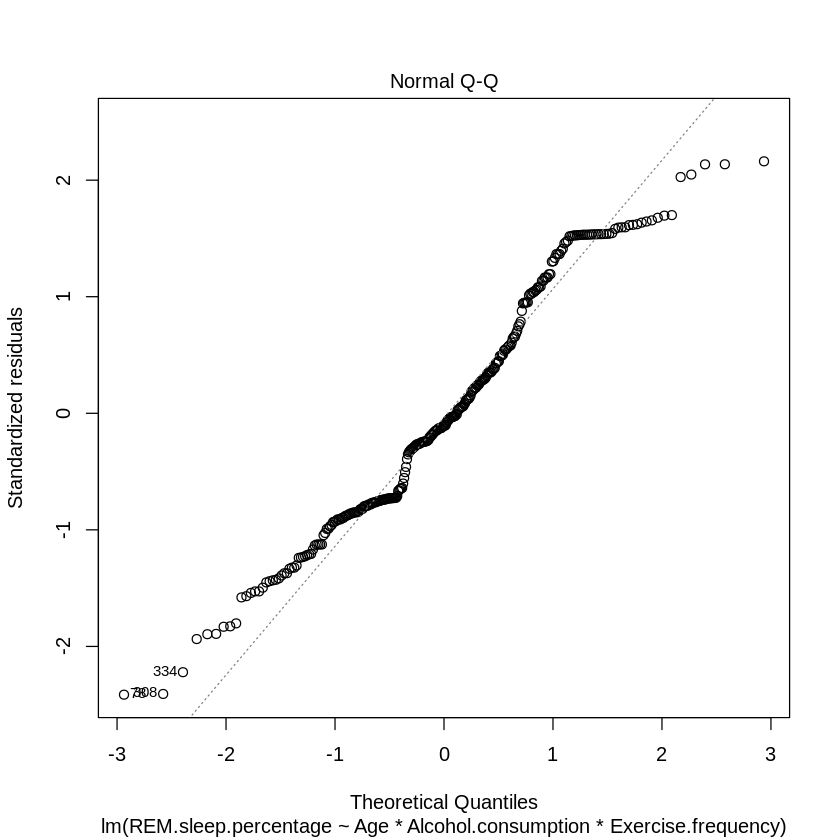

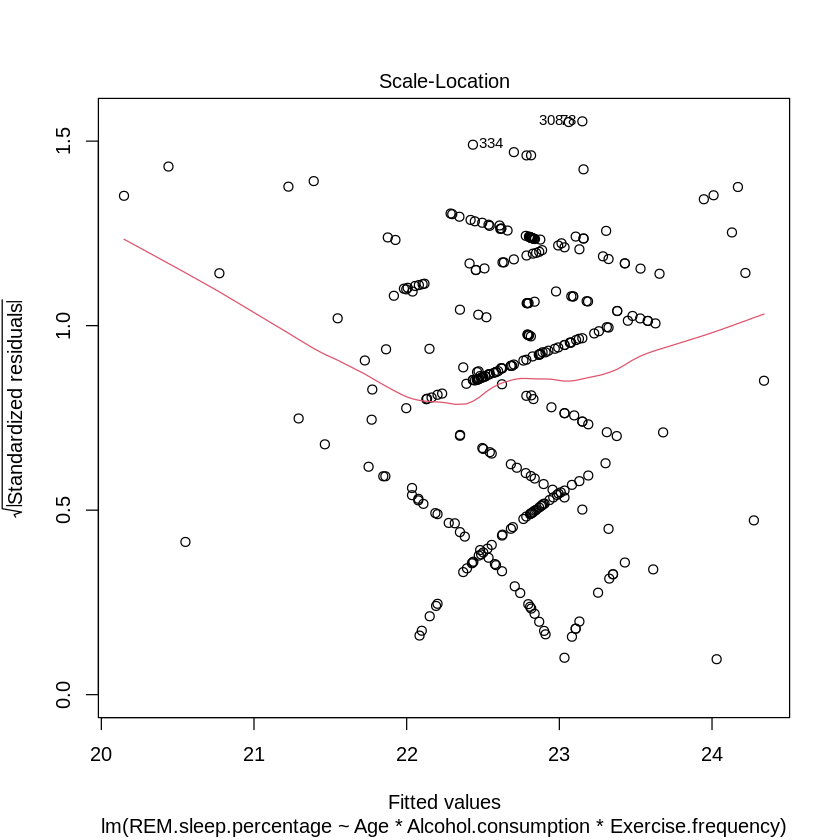

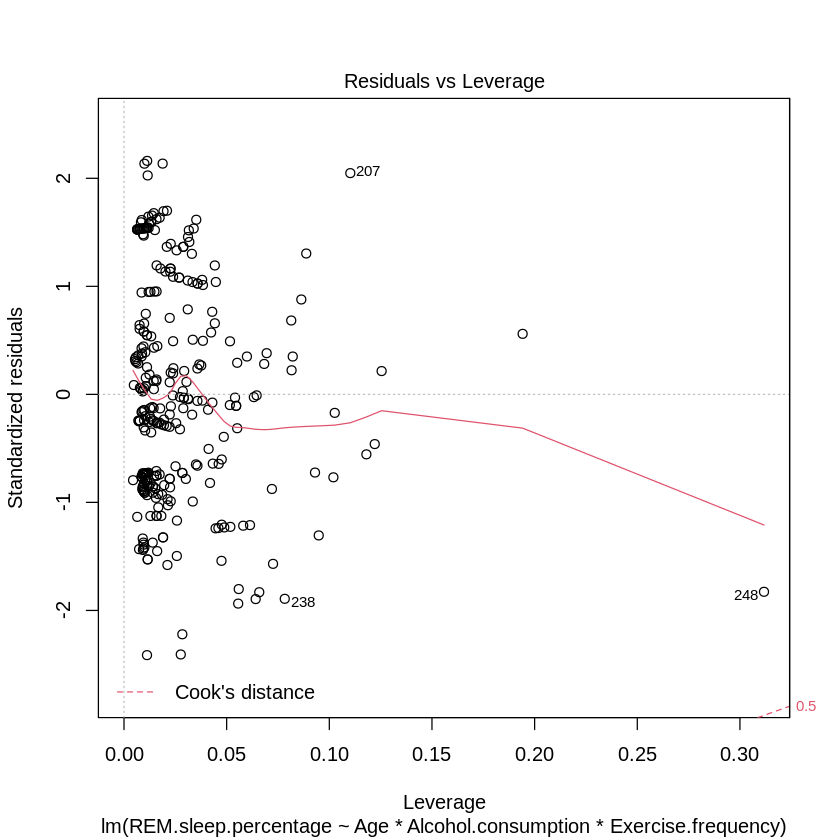

In [213]:
plot(reg_inter)

In [214]:
## lower AIC would be better, but the numbers would be different each time we run since training data 
## is randomly chose from the whole dataset.
## we also see AIC of reg_inter smaller than reg
AIC(reg)

[1] 1598.051

In [215]:
AIC(reg_inter)

[1] 1600.017

In [216]:
##We just want to see if any variables would have a stronger relationship
regsubsets(REM.sleep.percentage~Age * Alcohol.consumption * Exercise.frequency, data=sleep_training)

Subset selection object
Call: regsubsets.formula(REM.sleep.percentage ~ Age * Alcohol.consumption * 
    Exercise.frequency, data = sleep_training)
7 Variables  (and intercept)
                                           Forced in Forced out
Age                                            FALSE      FALSE
Alcohol.consumption                            FALSE      FALSE
Exercise.frequency                             FALSE      FALSE
Age:Alcohol.consumption                        FALSE      FALSE
Age:Exercise.frequency                         FALSE      FALSE
Alcohol.consumption:Exercise.frequency         FALSE      FALSE
Age:Alcohol.consumption:Exercise.frequency     FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive

In [217]:
## using reg model to predict the rem with the exact values mentioned in proposal
predict(reg,newdata=data.frame(Age=20,Exercise.frequency=3,Alcohol.consumption =4))

1 
22.23601

In [218]:
## using reg_inter model to predict the rem with the exact values mentioned in proposal
predict(reg_inter,newdata=data.frame(Age=20,Exercise.frequency=3,Alcohol.consumption =4))

1 
20.94672

In [219]:
## rmse for reg, note that rmse would change each time we run and we have seen rmse for 
## reg_inter smaller as well
rmse <- function(u,v) sqrt(mean((u-v)^2))

rmse(sleep_testing$REM.sleep.percentage,predict(reg,newdata=sleep_testing))

[1] 3.517002

In [220]:
##rmse for reg_inter

rmse(sleep_testing$REM.sleep.percentage,predict(reg_inter,newdata=sleep_testing))

[1] 3.551196